## Advanced regression Assignment- HOUSING COMPANY

Steps:
    1. Read and Understand the data
    2. Data Cleaning 
    3. Data Preperation 
    4. Model Build and Analysis

### 1.Read and Understand the data

In [1]:
# import all necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [2]:
# Read the dataset
hou=pd.read_csv("train.csv")
hou.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
hou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
hou.shape

(1460, 81)

#### As we can see many null values for many columns lets proceed to Data cleaning instead of visualising the data and also as there are too many columns

### 2.Data Cleaning 

In [5]:
# Check for the nulls in each column

hou.isnull().sum(axis=0)*100/len(hou)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [6]:
# Removing columns with more than 30% null values as there are only few columns with more than 30% null value 
hou=hou.loc[:,pd.isnull(hou).sum()*100/len(hou)<=30]
hou.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [7]:
hou.shape


# We can see that 5 columns are dropped because of their null values

(1460, 76)

In [8]:
hou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [9]:
# Numeric columns 
hou_numerics=hou.select_dtypes(include=['float64', 'int64'])
hou_numerics.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
cor=hou_numerics.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


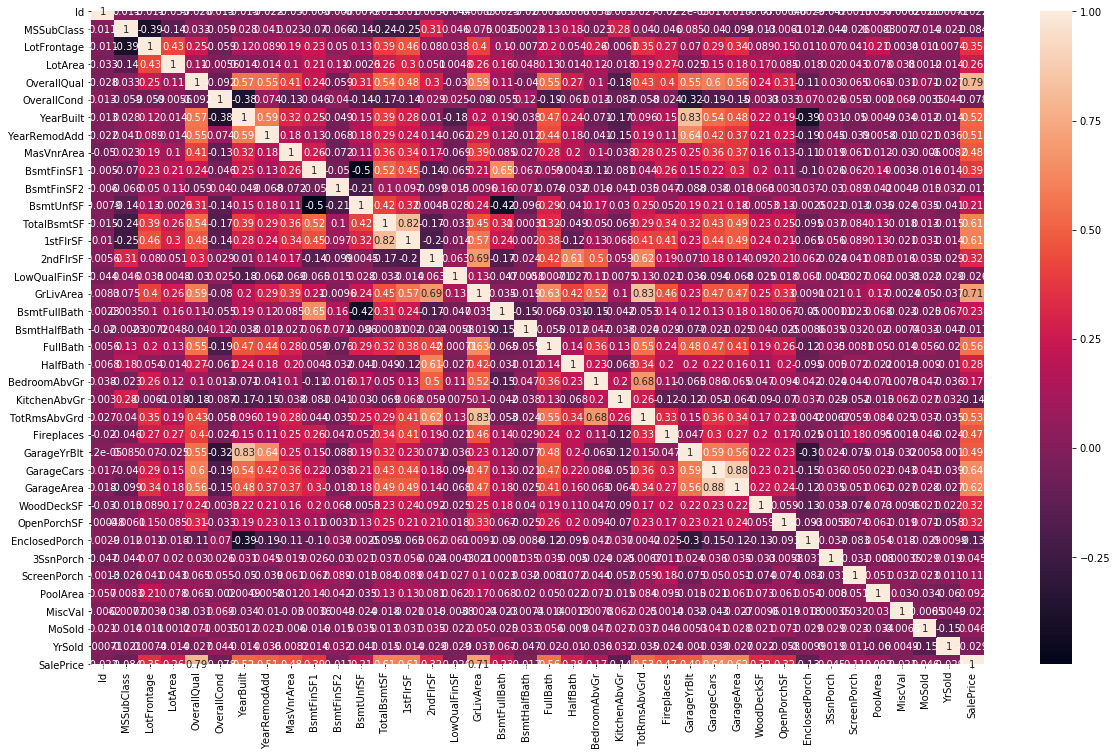

In [11]:
#Visualise the numeric columns and check for Correlation

plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True)
plt.show()

In [12]:
# Removing few columns which have hih correlativity with others say more than 75%
hou=hou.drop(['GarageYrBlt','GarageCars','TotRmsAbvGrd','1stFlrSF','TotalBsmtSF','YearBuilt','GrLivArea'],axis=1)
hou.shape

(1460, 69)

In [13]:
#Imputing all null values
hou_nul=hou.loc[:,pd.isnull(hou).any()]

In [14]:
hou_nul.columns

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [15]:
#Impute numeric null columns with median incase of outliers
hou['LotFrontage'].fillna(hou['LotFrontage'].median(),inplace=True)
hou['MasVnrArea'].fillna(hou['MasVnrArea'].median(),inplace=True)

In [16]:
hou_nul=hou.loc[:,pd.isnull(hou).any()]

In [17]:
hou_nul.head()

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
1,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
3,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA
4,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA


In [18]:
hou_nul.columns

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [19]:
hou['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [20]:
#Imputing categoricall vars with Mode 
hou['BsmtQual'].fillna('TA',inplace=True)
hou['Electrical'].fillna('SBrkr',inplace=True)
hou['MasVnrType'].fillna('None',inplace=True)
hou['BsmtCond'].fillna('TA',inplace=True)
hou['BsmtExposure'].fillna('No',inplace=True)
hou['BsmtFinType1'].fillna('Unf',inplace=True)
hou['BsmtFinType2'].fillna('Unf',inplace=True)
hou['GarageType'].fillna('Attchd',inplace=True)
hou['GarageQual'].fillna('TA',inplace=True)
hou['GarageFinish'].fillna('Unf',inplace=True)
hou['GarageCond'].fillna('TA',inplace=True)

In [21]:
# Creating dummies for categorical columns
hou_categorical = hou.select_dtypes(include=['object'])
hou_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [22]:
hou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

In [23]:
hou_cat=hou.select_dtypes(include=['object'])

In [24]:
hou_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [25]:
hou_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [26]:
k=[]
l=[]
for z in hou_cat.columns:
    try:
        print("Column is {0} and value is {1}".format(z,hou_cat[z].value_counts()[0]/len(hou_cat)))
        if (hou_cat[z].value_counts()[0]/len(hou_cat))<=0.85:
            k.append(z)
        else: l.append(z)
            
    except:
        print("Some Error in {0}".format(z))

Column is MSZoning and value is 0.7883561643835616
Column is Street and value is 0.9958904109589041
Column is LotShape and value is 0.6335616438356164
Column is LandContour and value is 0.897945205479452
Column is Utilities and value is 0.9993150684931507
Column is LotConfig and value is 0.7205479452054795
Column is LandSlope and value is 0.9465753424657535
Column is Neighborhood and value is 0.1541095890410959
Column is Condition1 and value is 0.863013698630137
Column is Condition2 and value is 0.9897260273972602
Column is BldgType and value is 0.8356164383561644
Column is HouseStyle and value is 0.49726027397260275
Column is RoofStyle and value is 0.7815068493150685
Column is RoofMatl and value is 0.9821917808219178
Column is Exterior1st and value is 0.3527397260273973
Column is Exterior2nd and value is 0.3452054794520548
Column is MasVnrType and value is 0.5972602739726027
Column is ExterQual and value is 0.6205479452054794
Column is ExterCond and value is 0.8780821917808219
Column 

In [27]:
# Remove the redundant columns i.e. remove columns whose max value itself takes more than 85%
hou=hou.drop(l,axis=1)

In [28]:
hou.shape

(1460, 51)

In [29]:
hou_cat=hou.select_dtypes(include=['object'])

In [30]:
hou_dum=pd.get_dummies(hou_cat,drop_first=True)

In [31]:
hou_dum.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [32]:
# drop categorical variables 
hou = hou.drop(list(hou_cat.columns), axis=1)

In [33]:
# concat dummy variables with hou
hou = pd.concat([hou, hou_dum], axis=1)

In [34]:
hou.shape

(1460, 152)

In [35]:
hou.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1970,0.0,216,0,...,0,0,1,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


### 3. Data Preperation

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# Split the data to train, test
hou_train, hou_test = train_test_split(hou,train_size=0.7,test_size = 0.3, random_state=100)

In [38]:
#Drop ID Column
hou_test=hou_test.drop('Id',axis=1)
hou_train=hou_train.drop('Id',axis=1)

In [39]:
hou_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 210 to 79
Columns: 151 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(2), int64(28), uint8(121)
memory usage: 367.9 KB


In [40]:
num=hou_train.select_dtypes(include=['int64','float64'])

In [41]:
num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [42]:
j=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
#Scale numeric columns
scaler=StandardScaler()

hou_train[j]=scaler.fit_transform(hou_train[j])
hou_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.657071,-0.115302,-0.473765,-0.779861,0.383154,-1.694350,-0.558025,0.043512,-0.293313,-0.374367,...,0,0,0,0,1,0,0,0,1,0
318,0.035976,0.926898,-0.056845,0.649651,-0.533005,0.390956,0.809137,1.160345,-0.293313,-0.454644,...,0,0,0,1,0,0,0,0,1,0
239,-0.195040,-0.794998,-0.169324,-0.065105,-1.449164,-1.694350,-0.558025,-0.761296,-0.293313,0.171964,...,0,0,1,0,1,0,0,0,1,0
986,-0.195040,-0.477806,-0.502297,-0.065105,2.215472,0.875911,-0.558025,-0.963574,-0.293313,-0.175904,...,0,0,0,0,1,0,0,0,1,0
1416,3.039179,-0.432493,0.082905,-1.494617,0.383154,-1.694350,-0.558025,-0.963574,-0.293313,0.475233,...,0,0,1,0,1,0,0,0,1,0


In [45]:
hou_train.shape

(1021, 151)

In [46]:
hou_test[j]=scaler.transform(hou_test[j])
hou_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,-0.888086,-0.432493,-0.144189,-1.494617,0.383154,-0.675945,-0.558025,0.361992,-0.293313,-0.704396,...,0,0,1,0,1,0,0,0,1,0
57,0.035976,0.881585,0.112505,0.649651,-0.533005,0.924407,-0.558025,-0.963574,-0.293313,0.660317,...,0,0,0,1,0,0,0,0,1,0
780,-0.888086,-0.296554,-0.253368,0.649651,-0.533005,0.536443,-0.355087,-0.963574,-0.293313,1.500998,...,0,0,0,0,0,0,0,0,1,0
382,0.035976,0.428455,-0.120412,0.649651,-0.533005,1.021398,-0.558025,-0.963574,-0.293313,0.836481,...,0,0,0,1,0,0,0,0,1,0
1170,0.498007,0.292515,-0.058786,-0.065105,0.383154,-0.384972,-0.558025,0.159714,-0.293313,0.022559,...,0,0,0,0,0,0,0,0,1,0


In [47]:
y_train=hou_train.pop('SalePrice')

In [48]:
X_train=hou_train

In [49]:
y_test=hou_test.pop('SalePrice')

In [50]:
X_test=hou_test

### 4. Model Building and Analysis

#### RFE using Linear Regression, RIDGE and LASSO REGRESSIONS

In [51]:
linreg=LinearRegression()

#### As the company want the significant variables which affect the Price , i would like to take only 20 most significant columns and then appy LASSO to it. Though Lasso also does feature elimination, i want it to be more precise so i perform RFE and then Lasso to ensure only significant features come into picture.

In [52]:
#Selecting only 20 out of 151 variables using RFE
from sklearn.feature_selection import RFE
rfe = RFE(linreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [53]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 130),
 ('LotFrontage', False, 91),
 ('LotArea', False, 55),
 ('OverallQual', True, 1),
 ('OverallCond', False, 75),
 ('YearRemodAdd', False, 51),
 ('MasVnrArea', False, 98),
 ('BsmtFinSF1', False, 26),
 ('BsmtFinSF2', False, 89),
 ('BsmtUnfSF', False, 28),
 ('2ndFlrSF', False, 6),
 ('LowQualFinSF', False, 115),
 ('BsmtFullBath', False, 64),
 ('BsmtHalfBath', False, 113),
 ('FullBath', False, 50),
 ('HalfBath', False, 94),
 ('BedroomAbvGr', False, 117),
 ('KitchenAbvGr', False, 111),
 ('Fireplaces', False, 73),
 ('GarageArea', False, 45),
 ('WoodDeckSF', False, 104),
 ('OpenPorchSF', False, 122),
 ('EnclosedPorch', False, 131),
 ('3SsnPorch', False, 110),
 ('ScreenPorch', False, 116),
 ('PoolArea', False, 127),
 ('MiscVal', False, 123),
 ('MoSold', False, 124),
 ('YrSold', False, 107),
 ('MSZoning_FV', False, 22),
 ('MSZoning_RH', False, 21),
 ('MSZoning_RL', False, 19),
 ('MSZoning_RM', False, 20),
 ('LotShape_IR2', False, 125),
 ('LotShape_IR3', False, 25),
 ('L

In [54]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_ImStucc', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_ImStucc', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA'],
      dtype='object')

In [55]:
#Build ridge,lasso on these 20 variables only
X_train2=X_train[col]

In [56]:
from sklearn.metrics import r2_score

In [57]:
linreg.fit(X_train2, y_train)

# predict
y_train_pred = linreg.predict(X_train2)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.7854160498242182

In [58]:
X_test2=X_test[col]

In [59]:
y_test_pred = linreg.predict(X_test2)
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7721234527310399

#### Using only RFE and Linear Regression we got test score as 77.2% and train score as 78.5%

### Ridge Regression

#### 1. Ridge regression after RFE

In [60]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train2, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [61]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007185,0.003554,0.001932,0.000470,0.0001,{'alpha': 0.0001},-0.346029,-0.358143,-0.364174,-0.302015,...,-0.336757,0.024682,19,-0.324868,-0.317115,-0.322391,-0.332718,-0.329545,-0.325327,0.005453
1,0.006945,0.000673,0.003097,0.000602,0.001,{'alpha': 0.001},-0.346028,-0.358138,-0.364171,-0.302014,...,-0.336755,0.024681,18,-0.324867,-0.317114,-0.322391,-0.332718,-0.329546,-0.325327,0.005453
2,0.006526,0.000665,0.002727,0.000373,0.01,{'alpha': 0.01},-0.346018,-0.358095,-0.364137,-0.302006,...,-0.336730,0.024673,17,-0.324864,-0.317113,-0.322389,-0.332715,-0.329547,-0.325325,0.005454
3,0.004569,0.001019,0.002006,0.000633,0.05,{'alpha': 0.05},-0.345969,-0.357914,-0.364001,-0.301967,...,-0.336626,0.024640,16,-0.324848,-0.317104,-0.322376,-0.332701,-0.329552,-0.325316,0.005455
4,0.007383,0.000860,0.002861,0.000451,0.1,{'alpha': 0.1},-0.345897,-0.357705,-0.363850,-0.301918,...,-0.336505,0.024603,14,-0.324832,-0.317090,-0.322366,-0.332685,-0.329559,-0.325307,0.005457
5,0.006413,0.001425,0.002712,0.000291,0.2,{'alpha': 0.2},-0.345736,-0.357337,-0.363594,-0.301821,...,-0.336287,0.024538,13,-0.324813,-0.317190,-0.322345,-0.332654,-0.329577,-0.325316,0.005424
6,0.006518,0.001098,0.002165,0.000990,0.3,{'alpha': 0.3},-0.345570,-0.357019,-0.363386,-0.301724,...,-0.336097,0.024482,12,-0.324820,-0.317260,-0.322318,-0.332624,-0.329602,-0.325325,0.005402
7,0.006844,0.001047,0.003188,0.000437,0.4,{'alpha': 0.4},-0.345383,-0.356737,-0.363224,-0.301630,...,-0.335928,0.024432,10,-0.324829,-0.317330,-0.322289,-0.332594,-0.329621,-0.325333,0.005379
8,0.004737,0.000479,0.002249,0.000386,0.5,{'alpha': 0.5},-0.345181,-0.356490,-0.363107,-0.301537,...,-0.335777,0.024392,9,-0.324847,-0.317389,-0.322261,-0.332568,-0.329650,-0.325343,0.005362
9,0.006919,0.000730,0.003073,0.000626,0.6,{'alpha': 0.6},-0.344969,-0.356309,-0.363009,-0.301447,...,-0.335646,0.024363,8,-0.324870,-0.317444,-0.322236,-0.332547,-0.329690,-0.325357,0.005349


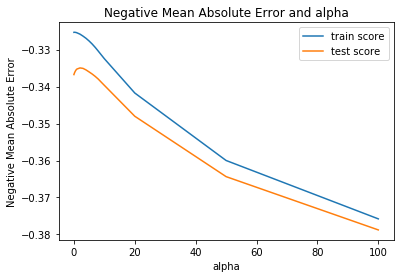

In [62]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float64')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [63]:
cv_results.loc[cv_results['mean_test_score']==max(cv_results['mean_test_score'])]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
14,0.005086,0.001292,0.002232,0.00068,2.0,{'alpha': 2.0},-0.34214,-0.355389,-0.36263,-0.301874,...,-0.334956,0.023756,1,-0.325678,-0.318045,-0.322299,-0.332914,-0.330186,-0.325825,0.005334


#### We take optimal alpha value as where TEST_SCORE is max , so alpha=2

In [64]:
#so alpha=2
alpha_r=2.0
ridge = Ridge(alpha=alpha_r)

ridge.fit(X_train2, y_train)
ridge.coef_

array([ 0.43831796,  0.37457125, -0.31742024,  1.07597937,  0.38061746,
        0.32355155, -0.52321294, -0.44772118, -0.23394175,  0.35597007,
       -0.30668832,  0.09598207,  0.20044363, -0.74673265, -0.53251058,
       -0.71377176,  0.39715528, -0.71209519, -0.43616993, -0.66705007])

In [65]:
y_train_pred_r=ridge.predict(X_train2)
y_test_pred_r=ridge.predict(X_test2)
print(r2_score(y_true=y_train, y_pred=y_train_pred_r))
print(r2_score(y_true=y_test, y_pred=y_test_pred_r))

0.783632552885753
0.7697884152955888


#### By Using Ridge regression after RFE, we got 76.9% test score and 78.3% train score

#### 2. Direct Ridge without RFE

In [66]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [67]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009253,0.002741,0.003038,0.000577,0.0001,{'alpha': 0.0001},-0.262293,-0.280443,-0.293943,-0.254508,...,-0.275595,0.014888,26,-0.222781,-0.185348,-0.210615,-0.223049,-0.215359,-0.211430,0.013858
1,0.010526,0.000880,0.003440,0.000856,0.001,{'alpha': 0.001},-0.262251,-0.280420,-0.293921,-0.254474,...,-0.275566,0.014894,25,-0.222774,-0.185348,-0.210611,-0.223047,-0.215358,-0.211428,0.013856
2,0.009832,0.000884,0.002806,0.000406,0.01,{'alpha': 0.01},-0.261874,-0.280210,-0.293716,-0.254136,...,-0.275286,0.014953,24,-0.222716,-0.185357,-0.210570,-0.223027,-0.215348,-0.211403,0.013840
3,0.008667,0.001402,0.002505,0.000935,0.05,{'alpha': 0.05},-0.260643,-0.279461,-0.293018,-0.252730,...,-0.274236,0.015176,23,-0.222540,-0.185416,-0.210438,-0.222957,-0.215292,-0.211328,0.013776
4,0.007437,0.000570,0.002710,0.000351,0.1,{'alpha': 0.1},-0.259575,-0.278774,-0.292378,-0.251149,...,-0.273158,0.015406,22,-0.222384,-0.185502,-0.210342,-0.222908,-0.215228,-0.211273,0.013707


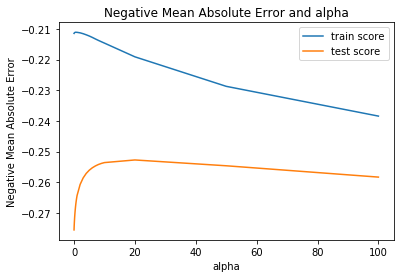

In [68]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float64')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [69]:
cv_results.loc[cv_results['mean_test_score']==max(cv_results['mean_test_score'])]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
23,0.008264,0.001576,0.001992,0.000536,20.0,{'alpha': 20},-0.233801,-0.284915,-0.26355,-0.227232,...,-0.252754,0.020803,1,-0.229974,-0.199731,-0.216299,-0.228715,-0.22068,-0.21908,0.01092


In [70]:
alpha_r2=20
ridge2 = Ridge(alpha=alpha_r2)

ridge2.fit(X_train, y_train)
ridge2.coef_

array([-8.70656347e-02, -2.16590501e-02,  4.98617101e-02,  2.49772810e-01,
        5.00932314e-02,  5.18039208e-02,  6.96761547e-02,  1.09833525e-01,
        4.03998610e-02,  1.20709035e-01,  2.52172907e-01, -1.03893915e-03,
        6.27152647e-02,  7.54114790e-03,  1.05680994e-01,  4.33467605e-02,
        1.41529084e-02, -1.14678071e-02,  6.21675972e-02,  1.03027294e-01,
        3.19391548e-02, -1.01647764e-02,  9.22724490e-05,  1.94614779e-02,
        1.45793461e-02, -6.87181513e-03, -1.01351855e-02, -9.70953608e-03,
       -2.37945959e-02,  3.09381204e-02,  2.12588245e-02,  6.57713873e-02,
       -3.59001241e-02,  1.38784319e-02, -1.34045214e-01, -1.93512601e-03,
        1.02542631e-01, -9.84185181e-02, -3.19982847e-02, -4.70906708e-03,
       -6.43679101e-03, -1.14112341e-02,  6.41971596e-03,  1.85081335e-02,
       -8.77255005e-02,  1.77823890e-01, -1.66536054e-01, -8.98945516e-02,
       -6.07182469e-02,  1.02773824e-02, -1.09148219e-01, -8.67928339e-02,
       -1.05084859e-02, -

In [71]:
y_train_pred_r2=ridge2.predict(X_train)
y_test_pred_r2=ridge2.predict(X_test)
print(r2_score(y_true=y_train, y_pred=y_train_pred_r2))
print(r2_score(y_true=y_test, y_pred=y_test_pred_r2))

0.8648729411931662
0.8529575452523681


#### As in RFE we already decreased the columns we indirectly reduced complexity, so lesser alpha(=2) is enough to regularise model. But without RFE, we need to regularise model to get optimal complexity with all columns so more alpha(=20) is needed to regularise model.

### Lasso Regression

#### 1. Lasso after RFE

In [72]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train2, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [73]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008726,0.002275,0.002355,0.000849,0.0001,{'alpha': 0.0001},-0.346148,-0.357699,-0.363882,-0.301856,...,-0.336566,0.024628,2,-0.324812,-0.317148,-0.322367,-0.332641,-0.329570,-0.325308,0.005430
1,0.038771,0.063890,0.002400,0.000375,0.001,{'alpha': 0.001},-0.344533,-0.356459,-0.361377,-0.302463,...,-0.335282,0.023890,1,-0.325336,-0.318214,-0.322856,-0.332595,-0.330233,-0.325847,0.005143
2,0.005962,0.000616,0.002056,0.000280,0.01,{'alpha': 0.01},-0.362061,-0.397242,-0.385092,-0.338951,...,-0.366482,0.021773,3,-0.358243,-0.349961,-0.360297,-0.364044,-0.364785,-0.359466,0.005325
3,0.006668,0.001449,0.002644,0.000511,0.05,{'alpha': 0.05},-0.399703,-0.449710,-0.445227,-0.412290,...,-0.425852,0.019107,4,-0.431830,-0.414179,-0.420732,-0.430595,-0.424190,-0.424305,0.006504
4,0.007148,0.001129,0.003233,0.000402,0.1,{'alpha': 0.1},-0.400885,-0.458021,-0.441501,-0.407513,...,-0.427229,0.021152,5,-0.434143,-0.418015,-0.421128,-0.430003,-0.426896,-0.426037,0.005842


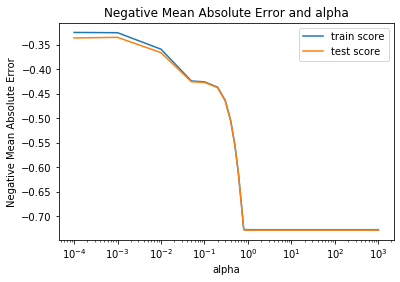

In [74]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float64')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [75]:
cv_results.loc[cv_results['mean_test_score']==max(cv_results['mean_test_score'])]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.038771,0.06389,0.0024,0.000375,0.001,{'alpha': 0.001},-0.344533,-0.356459,-0.361377,-0.302463,...,-0.335282,0.02389,1,-0.325336,-0.318214,-0.322856,-0.332595,-0.330233,-0.325847,0.005143


#### I take optimal alpha value , where max Test_score is there so alpha=0.001

In [76]:
#so alpha=0.001
alpha_l =0.001

lasso = Lasso(alpha=alpha_l)
        
lasso.fit(X_train2, y_train)
z=lasso.coef_
lasso.coef_

array([ 0.43339073,  0.36756998, -0.30167908,  1.10972549,  0.36276511,
        0.28654116, -0.51371656, -0.43695439, -0.        ,  0.34344174,
       -0.        ,  0.        ,  0.07249417, -0.78345454, -0.54990508,
       -0.73255536,  0.39560841, -0.75156729, -0.44989249, -0.68323277])

In [77]:
y_train_pred_l=lasso.predict(X_train2)
y_test_pred_l=lasso.predict(X_test2)
print(r2_score(y_true=y_train, y_pred=y_train_pred_l))
print(r2_score(y_true=y_test, y_pred=y_test_pred_l))

0.7829447414064256
0.7683911180890364


#### By using Lasso Regression after RFE we got test score as 76.8% and train score as 78.29%

#### 2. Direct Lasso without RFE

In [78]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [79]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.077202,0.013582,0.003152,0.000302,0.0001,{'alpha': 0.0001},-0.255648,-0.276347,-0.291102,-0.249160,...,-0.270432,0.015647,2,-0.222206,-0.186164,-0.210577,-0.223334,-0.215126,-0.211482,0.013495
1,0.022948,0.005423,0.003212,0.000397,0.001,{'alpha': 0.001},-0.242812,-0.270458,-0.275390,-0.231721,...,-0.254662,0.016420,1,-0.224084,-0.192404,-0.212439,-0.225406,-0.217719,-0.214410,0.011947
2,0.012994,0.001675,0.002312,0.000408,0.01,{'alpha': 0.01},-0.248356,-0.325192,-0.273323,-0.244929,...,-0.271748,0.028795,3,-0.259336,-0.235121,-0.247895,-0.256718,-0.255072,-0.250828,0.008723
3,0.009857,0.001731,0.002942,0.000838,0.05,{'alpha': 0.05},-0.277959,-0.375758,-0.335814,-0.281395,...,-0.315401,0.036611,4,-0.318247,-0.282865,-0.303330,-0.315689,-0.315731,-0.307172,0.013221
4,0.009698,0.001358,0.002825,0.000926,0.1,{'alpha': 0.1},-0.308419,-0.399673,-0.359377,-0.306665,...,-0.342375,0.034699,5,-0.348549,-0.312236,-0.332867,-0.349593,-0.345830,-0.337815,0.014120


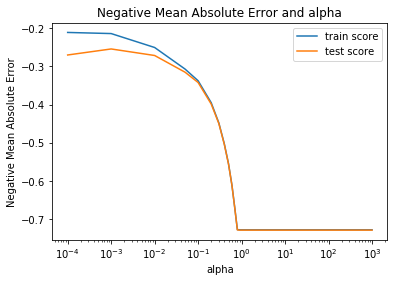

In [80]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float64')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [81]:
alpha_l2=0.0001
lasso2 = Lasso(alpha=alpha_l2)
        
lasso2.fit(X_train, y_train)
lasso2.coef_

array([-2.70817383e-02, -4.00931002e-02,  6.21259796e-02,  1.84343247e-01,
        5.32632472e-02,  3.97377777e-02,  2.97299465e-02,  1.08847920e-01,
        4.19799677e-02,  1.36775782e-01,  3.58425667e-01,  1.33912170e-02,
        5.92989001e-02,  1.51801743e-02,  9.66102994e-02,  3.61457983e-02,
        1.07017347e-02, -2.06328633e-02,  4.64813429e-02,  8.07822019e-02,
        2.78002763e-02, -1.14569545e-02,  3.65796820e-04,  2.09395535e-02,
        1.41275700e-02, -6.58875367e-03, -7.57774218e-03, -8.76451888e-03,
       -2.11871002e-02,  1.18876649e-01,  2.01332660e-01,  1.81227566e-01,
        1.71801762e-01,  1.29660483e-02, -3.43178750e-01,  2.20292108e-02,
        1.11100267e-01, -2.16068364e-01, -2.08593831e-01, -1.75083529e-02,
       -4.28377262e-03,  1.89006277e-02, -0.00000000e+00,  6.05774296e-03,
        1.80058317e-02,  3.57679187e-01, -2.21661219e-01,  4.31268516e-02,
       -1.46482727e-01, -0.00000000e+00, -1.44216203e-01, -8.47498382e-02,
        4.05149537e-02, -

In [82]:
lasso_param=list(lasso2.coef_)
lasso_param=[round(x,3) for x in lasso_param]
arr=np.asarray(lasso_param)
arr

array([-0.027, -0.04 ,  0.062,  0.184,  0.053,  0.04 ,  0.03 ,  0.109,
        0.042,  0.137,  0.358,  0.013,  0.059,  0.015,  0.097,  0.036,
        0.011, -0.021,  0.046,  0.081,  0.028, -0.011,  0.   ,  0.021,
        0.014, -0.007, -0.008, -0.009, -0.021,  0.119,  0.201,  0.181,
        0.172,  0.013, -0.343,  0.022,  0.111, -0.216, -0.209, -0.018,
       -0.004,  0.019, -0.   ,  0.006,  0.018,  0.358, -0.222,  0.043,
       -0.146, -0.   , -0.144, -0.085,  0.041, -0.04 ,  0.799,  0.512,
       -0.156, -0.031, -0.072,  0.076,  0.357,  0.49 , -0.022,  0.232,
       -0.045, -0.078, -0.302, -0.264,  0.17 ,  0.296, -0.404, -0.162,
       -0.2  ,  0.083,  0.095,  0.004,  0.06 ,  0.03 ,  0.094,  0.056,
        0.267, -0.083,  0.285, -0.   , -0.153, -0.112, -0.547, -0.083,
       -0.039,  0.37 ,  0.   ,  0.007, -0.001,  0.07 ,  0.023,  0.   ,
       -0.032, -0.   ,  0.161,  0.036,  0.405,  0.049,  0.   , -0.005,
       -0.   , -0.187,  0.   , -0.036, -0.201,  0.048,  0.062,  0.   ,
      

In [83]:
y_train_pred_l2=lasso2.predict(X_train)
y_test_pred_l2=lasso2.predict(X_test)
print(r2_score(y_true=y_train, y_pred=y_train_pred_l2))
print(r2_score(y_true=y_test, y_pred=y_test_pred_l2))

0.8820650084458189
0.8510747788114933


#### Lasso after RFE is better as we need more significant columns so lets take Lasso after RFE values

In [87]:
data={'Train_R2_score':[0.87,0.78,0.88,0.78],'Test_R2_score':[0.85,0.77,0.85,0.77]}
df=pd.DataFrame(data,index=['Ridge after Rfe','Ridge','Lasso after Rfe','lasso'])
df

,Train_R2_score,Test_R2_score
Ridge after Rfe,0.87,0.85
Ridge,0.78,0.77
Lasso after Rfe,0.88,0.85
lasso,0.78,0.77


In [85]:
# So finally our model coefficients with columns are as shown
s=pd.DataFrame({'Coefficients':list(z)},index=X_train2.columns)#columns='Coefficients')
s

,Coefficients
OverallQual,0.433391
Neighborhood_Crawfor,0.367570
Neighborhood_IDOTRR,-0.301679
Neighborhood_NoRidge,1.109725
Neighborhood_NridgHt,0.362765
Neighborhood_StoneBr,0.286541
BldgType_Twnhs,-0.513717
BldgType_TwnhsE,-0.436954
Exterior1st_BrkComm,-0.000000
Exterior1st_BrkFace,0.343442
